In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sici
from scipy.linalg import toeplitz
import numba as nb

In [74]:
def get_acf(tau,f1,f2):
    s1,c1=sici(2*np.pi*f1*tau)
    s2,c2=sici(2*np.pi*f2*tau)
    return c2-c1

In [76]:
N=1000

In [77]:
taus=np.arange(0,N)
f2=0.5
f1=0.05
print(f1*N,f2*N)
acf1=get_acf(taus[1:],f1,f2)
acf1=np.hstack([np.log(f2/f1),acf1])

50.0 500.0


In [78]:
N

1000

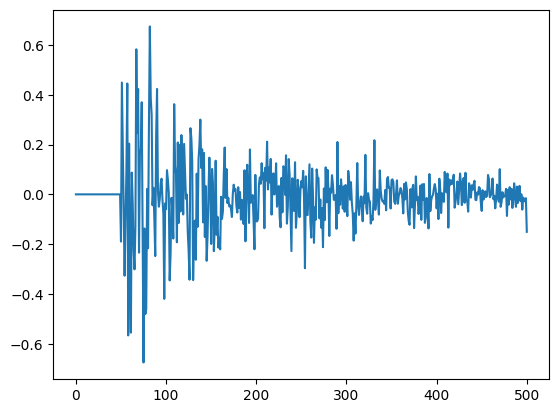

In [124]:
ps=np.zeros(N//2+1,dtype='complex128')
ps[int(f1*N):int(f2*N)+1]=1/np.arange(int(f1*N),int(f2*N)+1) #nyquist included
temp=np.random.randn(N)
plt.plot(np.fft.rfft(temp)*ps)
x=np.fft.irfft(np.fft.rfft(temp)*ps)
acf_dft=np.fft.irfft(ps)

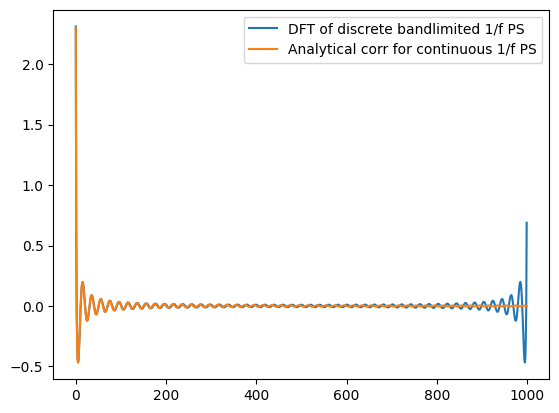

In [125]:
plt.plot(acf_dft*N/2, label='DFT of discrete bandlimited 1/f PS')
plt.plot(acf1, label='Analytical corr for continuous 1/f PS')
plt.legend()
# plt.xlim(400,450)

In [132]:
C=toeplitz(acf1)+np.eye(N)*1e-4
Cinv=np.linalg.inv(C)

In [101]:
n_future_coarse = 1000
osamp=10
n_future_fine = n_future_coarse*osamp

In [136]:
npoints=n_future_fine
dtaus=np.arange(1,npoints+1)/npoints
coeff_arr = np.zeros((len(dtaus),N))
my_tau = taus.copy()
dtaus

array([1.000e-04, 2.000e-04, 3.000e-04, ..., 9.998e-01, 9.999e-01,
       1.000e+00])

In [137]:
taus

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [103]:
for i,dtau in enumerate(dtaus):
    tau=my_tau+dtaua
    vec=get_acf(tau,f1,f2)
    vec=vec[::-1]
    coeff=Cinv@vec
    coeff_arr[i,:]=coeff

In [104]:
coeff_arr.shape

(10000, 1000)

In [105]:
u,s,vT=np.linalg.svd(coeff_arr)

In [127]:
coarse_ts = np.hstack([x,np.zeros(n_future_coarse)])
coarse_sigma = C[0,0]-coeff_arr[-1]@Cinv@coeff_arr[-1]

In [128]:
coarse_sigma

-3477342.985795898

In [135]:
coeff_arr[-1]

array([-2.74439928e-03, -5.10579934e-03, -8.93830955e-03, -1.40180156e-02,
       -2.05253335e-02, -2.83905107e-02, -3.75307509e-02, -4.76807781e-02,
       -5.84942770e-02, -6.94726436e-02, -8.00405116e-02, -8.95265324e-02,
       -9.72393013e-02, -1.02481343e-01, -1.04627863e-01, -1.03156611e-01,
       -9.77199199e-02, -8.81710895e-02, -7.46148617e-02, -5.74117329e-02,
       -3.71931923e-02, -1.48311935e-02,  8.58817538e-03,  3.18322964e-02,
        5.35847516e-02,  7.25394711e-02,  8.74825721e-02,  9.73913988e-02,
        1.01509647e-01,  9.94241640e-02,  9.11061488e-02,  7.69414010e-02,
        5.77177127e-02,  3.45955764e-02,  9.03668458e-03, -1.72807564e-02,
       -4.25791924e-02, -6.50997121e-02, -8.32354996e-02, -9.56481799e-02,
       -1.01379793e-01, -9.99296158e-02, -9.13098998e-02, -7.60543235e-02,
       -5.51973079e-02, -3.02044702e-02, -2.87779386e-03,  2.47775212e-02,
        5.06960875e-02,  7.29133233e-02,  8.97135447e-02,  9.97715916e-02,
        1.02258318e-01,  

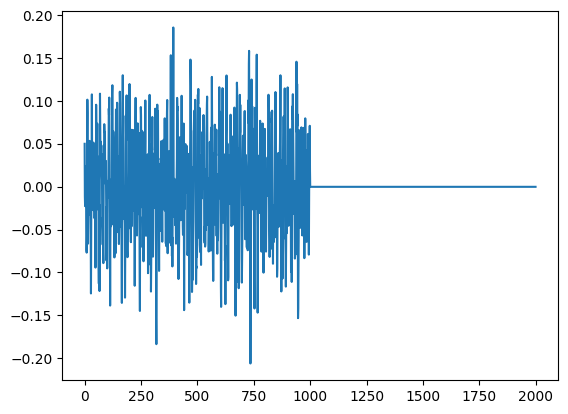

In [121]:
plt.plot(coarse_ts)

In [117]:
coeff_arr[-1]

array([-2.74439928e-03, -5.10579934e-03, -8.93830955e-03, -1.40180156e-02,
       -2.05253335e-02, -2.83905107e-02, -3.75307509e-02, -4.76807781e-02,
       -5.84942770e-02, -6.94726436e-02, -8.00405116e-02, -8.95265324e-02,
       -9.72393013e-02, -1.02481343e-01, -1.04627863e-01, -1.03156611e-01,
       -9.77199199e-02, -8.81710895e-02, -7.46148617e-02, -5.74117329e-02,
       -3.71931923e-02, -1.48311935e-02,  8.58817538e-03,  3.18322964e-02,
        5.35847516e-02,  7.25394711e-02,  8.74825721e-02,  9.73913988e-02,
        1.01509647e-01,  9.94241640e-02,  9.11061488e-02,  7.69414010e-02,
        5.77177127e-02,  3.45955764e-02,  9.03668458e-03, -1.72807564e-02,
       -4.25791924e-02, -6.50997121e-02, -8.32354996e-02, -9.56481799e-02,
       -1.01379793e-01, -9.99296158e-02, -9.13098998e-02, -7.60543235e-02,
       -5.51973079e-02, -3.02044702e-02, -2.87779386e-03,  2.47775212e-02,
        5.06960875e-02,  7.29133233e-02,  8.97135447e-02,  9.97715916e-02,
        1.02258318e-01,  